In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/airline-passengers.csv"
df = pd.read_csv(url)

In [2]:
df.head()

Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

In [3]:
df.shape

(144, 2)

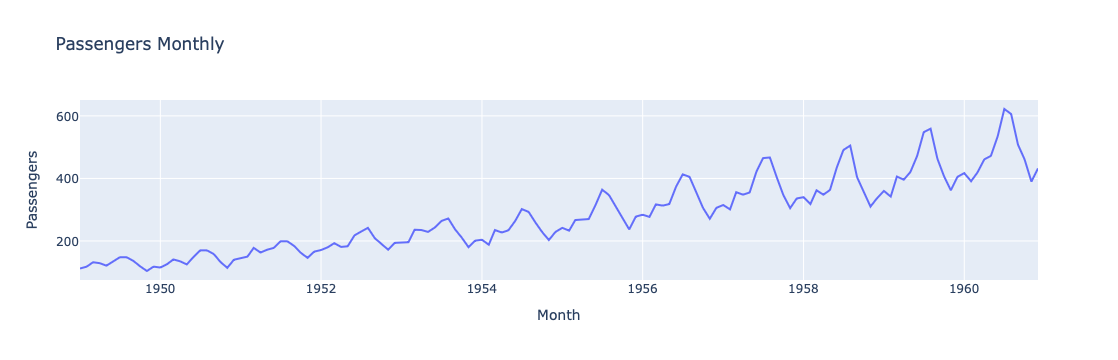

In [4]:
px.line(df, x='Month',y='Passengers', title='Passengers Monthly')

In [5]:
df2= df

In [6]:
df2['Month']=pd. to_datetime(df2['Month'], format='%Y-%m')

In [7]:
df2['year']=df2['Month'].dt.year 
df2['month']=df2['Month'].dt.month

In [8]:
df.head()

Month  Passengers  year  month
0 1949-01-01         112  1949      1
1 1949-02-01         118  1949      2
2 1949-03-01         132  1949      3
3 1949-04-01         129  1949      4
4 1949-05-01         121  1949      5

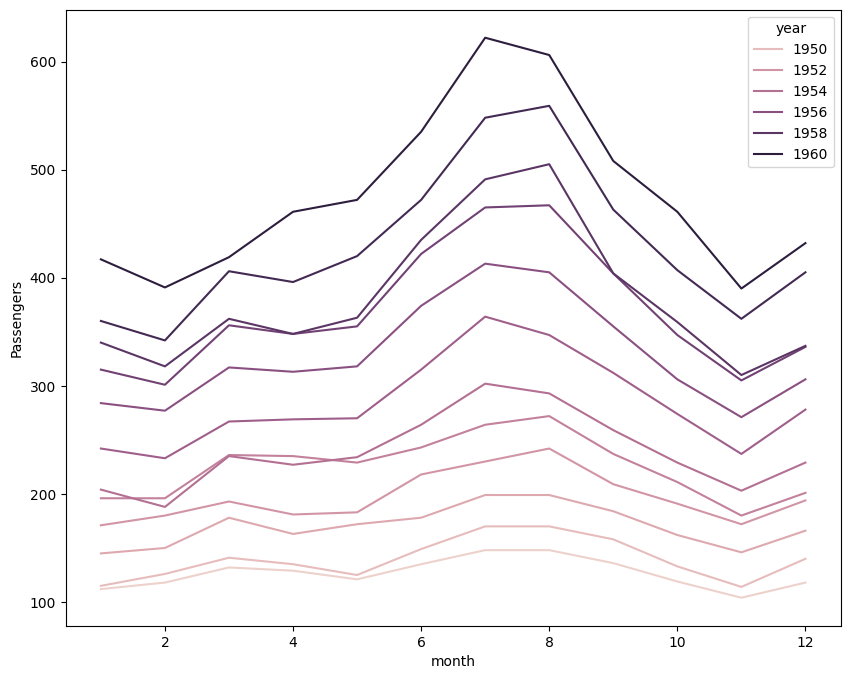

In [9]:
plt.figure(figsize=(10,8))
sns.lineplot(df2,x='month' ,y='Passengers', hue='year');

In [10]:
#pip install prophet

In [11]:
forecast_data = df.rename(columns={'Month':'ds','Passengers' :'y'})

In [12]:
forecast_data

ds    y  year  month
0   1949-01-01  112  1949      1
1   1949-02-01  118  1949      2
2   1949-03-01  132  1949      3
3   1949-04-01  129  1949      4
4   1949-05-01  121  1949      5
..         ...  ...   ...    ...
139 1960-08-01  606  1960      8
140 1960-09-01  508  1960      9
141 1960-10-01  461  1960     10
142 1960-11-01  390  1960     11
143 1960-12-01  432  1960     12

[144 rows x 4 columns]

00:01:00 - cmdstanpy - INFO - Chain [1] start processing
00:01:00 - cmdstanpy - INFO - Chain [1] done processing


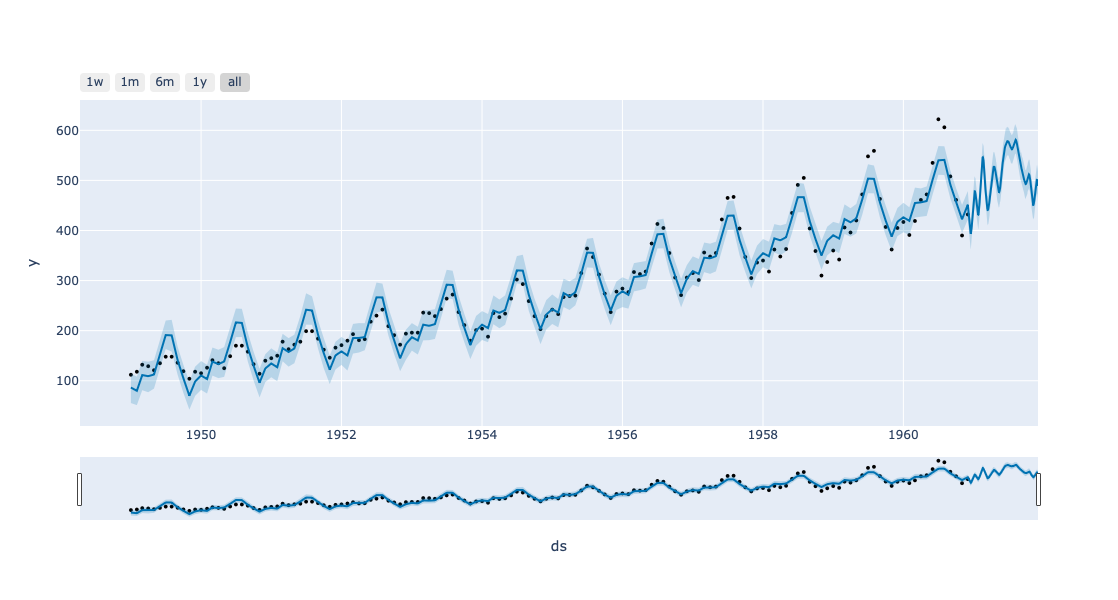

In [13]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

model=Prophet()
model.fit(forecast_data)

forecasts = model.make_future_dataframe(periods=365)

predictions = model.predict(forecasts)

plot_plotly(model,predictions)

###  Until here, this is how i deal with a time series project. Now i will look up how the code provided in the website handles this project.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [15]:
np.random.seed(42) 
#The random seed helps to stabilize the training process and ensures that the model is learning the underlying patterns in the data,
# rather than just picking up on random noise or artifacts.

In [16]:
data2 = np.array(df['Passengers']) #this np array function returns a 1D array of the data we need 2D for our scaler

In [17]:
data2

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [18]:
data = df['Passengers'].values.astype(float).reshape(-1, 1)

In [19]:
data

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [20]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [21]:
scaled_data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [22]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(scaled_data, test_size=0.2, shuffle=False)

#train_size = int(len(scaled_data) * 0.8)
#train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_dataset(dataset, time_step=1):
    x, y = [], []
    for i in range(len(dataset) - time_step - 1):
    
        x.append(dataset[i:(i + time_step), 0]) #for example this x takes the first indexed row; i = 1 lets say. the statement in the 
                                                # brackets becomes 1:(1+1) -> i:(i+time_step): conclusion x gets the 1 indexed row.
        y.append(dataset[i + time_step, 0]) # and while i=1 and x gets the first row, y statement becomes, 1+1 which is basically 
                                            #the second element (1 higher than x)
    return np.array(x), np.array(y)

# Use 10 time steps (previous 10 months) to predict the next month's passenger count
time_step = 10
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
x_train = x_train.reshape((x_train.shape[0], time_step, 1))
x_test = x_test.reshape((x_test.shape[0], time_step, 1))


In [23]:
model = Sequential()
model.add(LSTM(30, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=50)


Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0328  
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0103  
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0092
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090   
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075   
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080
Epoch 9/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068
Epoch 10/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082
Epoch 11/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075  
Epoch 12/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065  
Epoch 13/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069  
Epoch 14/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071  
Epoch 15/50
104/104 ━━━━━━━━━━━━━━━━━━━

In [24]:
# Predict on the train and test data. This linre is slightly different than we used to implement. 
# We are making predictions on x_train too to see and interpret the models performance
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [25]:
# Inverse transform predictions and actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
#Explanation;

In [26]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, train_predict)
mse_test = mean_squared_error(y_test, test_predict)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [27]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

In [28]:
print(f'R2 score for training data prediction is: {r2_train}\nR2 score for test data prediction is: {r2_test}')

R2 score for training data prediction is: 0.9415522252254036
R2 score for test data prediction is: 0.7484377659597056


### ..obvious overfitting but the data is too little to deal with it

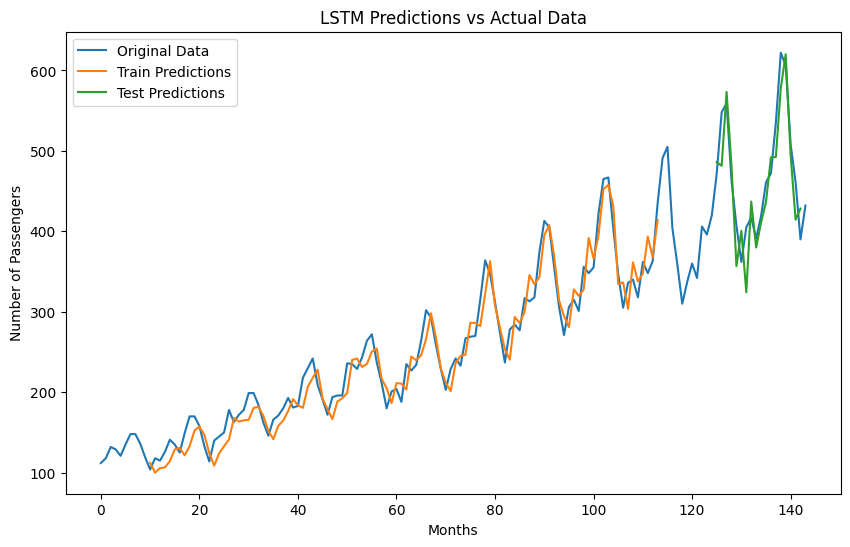

In [29]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Passengers'], label="Original Data")
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(data) - 1, :] = test_predict

plt.plot(train_predict_plot, label="Train Predictions")
plt.plot(test_predict_plot, label="Test Predictions")
plt.legend()
plt.title("LSTM Predictions vs Actual Data")
plt.xlabel("Months")
plt.ylabel("Number of Passengers")
plt.show()


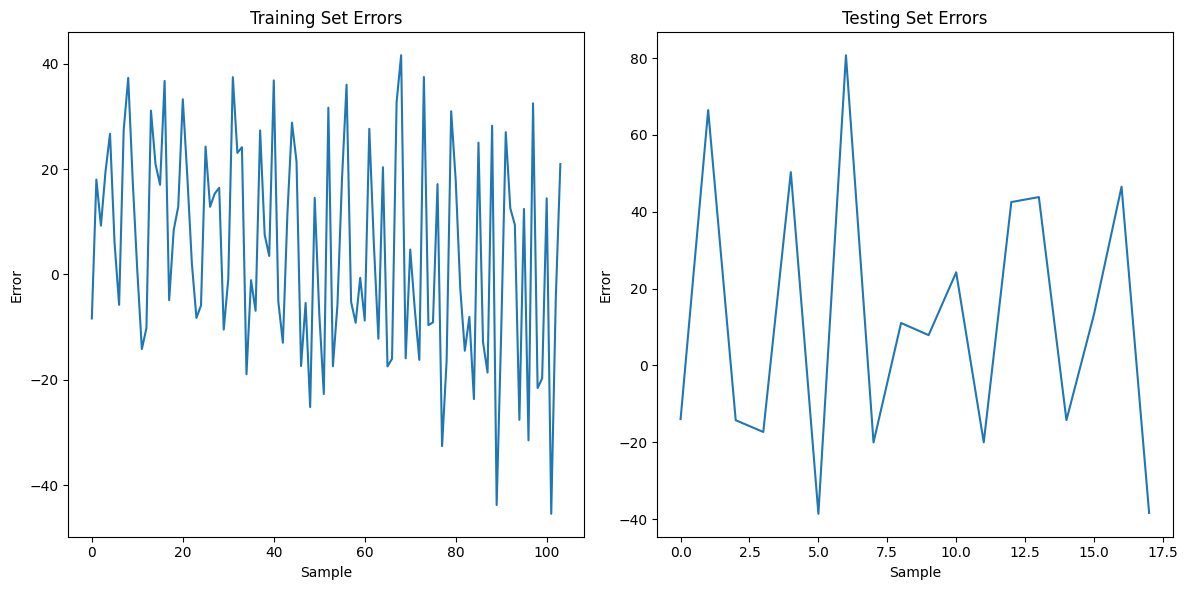

In [30]:
import matplotlib.pyplot as plt

# Calculate the errors
train_error = y_train - train_predict
test_error = y_test - test_predict

# Plot the errors
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_error)
plt.title('Training Set Errors')
plt.xlabel('Sample')
plt.ylabel('Error')

plt.subplot(1, 2, 2)
plt.plot(test_error)
plt.title('Testing Set Errors')
plt.xlabel('Sample')
plt.ylabel('Error')

plt.tight_layout()
plt.show()